In [64]:
import numpy as np
from matplotlib import pyplot as plt

from get_solution_not_const_k import get_solution

In [65]:
x_left, x_right = 0.0, 1.5
c = 0.925
UA, UB = 6.0, 0.6
n = 150


def k(x):
    return 1.5 if x < c else 0.4


def q(x):
    return 7.5 if x < c else 12


def f(x):
    return 7 * np.exp(-x)


def apply_boundary_conditions(a, b, c, d, h):
    k0_halph = 3
    x0_halph = x_left + h / 2
    If0 = -f(x0_halph) + f(x_left)
    # a[0] = None  # не используется в расчетах
    b[0] = -k0_halph / h
    c[0] = 0
    d[0] = If0
    
    kN_halph = 0.4
    xN_halph = x_right - h / 2
    IfN = -f(x_right) + f(xN_halph)
    a[-1] = 0  
    b[-1] = kN_halph / h
    # c[-1] = None # не используется в расчетах
    d[-1] = IfN

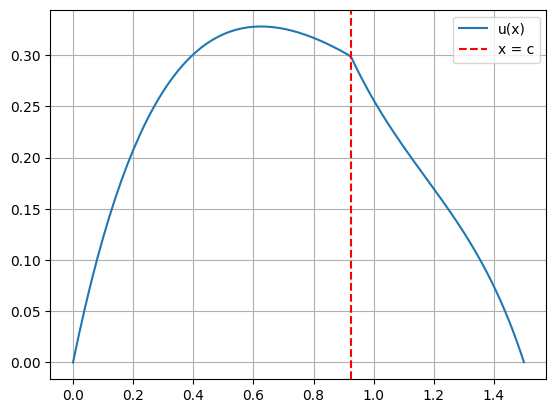

In [74]:
u, x = get_solution(k, q, f, apply_boundary_conditions, n, x_left, x_right)
plt.plot(x, u, label='u(x)')
plt.axvline(x=c, linestyle='--', c='r', label='x = c')
plt.legend()
plt.grid(True)